In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
import os


from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import History

C:\Users\jaysh\AppData\Local\Temp\ipykernel_15696\531805135.py:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
def load_data(data_folder):
    reviews = []
    labels = []

    for label in ['pos', 'neg']:
        folder_path = os.path.join(data_folder, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                review = file.read()
                reviews.append(review)
                labels.append(1 if label == 'pos' else 0)

    return reviews, labels

In [3]:
# Load and preprocess data
data_folder_train = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\train'  # Replace with the actual path to your dataset
data_folder_test = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\test'  # Replace with the actual path to your dataset


In [4]:
X_train, y_train = load_data(data_folder_train)
X_test, y_test = load_data(data_folder_test)
# Convert to numpy arrays
y_train, y_test = np.array(y_train), np.array(y_test)


In [5]:
from tensorflow.keras.callbacks import History

In [6]:
max_words = 10000  # Consider top 10,000 words in the vocabulary
max_len = 100  # Maximum length of a review

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Vanilla

In [7]:
Vanilla_accuracy = []
Vanilla_loss = []

## State dim = 20


Reloading Tuner from Vanilla_tuning20\Vanilla_hyperparameter_tuning\tuner0.json
Results summary
Results in Vanilla_tuning20\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
state_dim: 20
dropout: 0.4
learning_rate: 0.001
Score: 0.8533999919891357

Trial 2 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.001
Score: 0.8434000015258789

Trial 1 summary
Hyperparameters:
state_dim: 20
dropout: 0.4
learning_rate: 0.01
Score: 0.8367999792098999

Trial 4 summary
Hyperparameters:
state_dim: 20
dropout: 0.0
learning_rate: 0.01
Score: 0.8303999900817871

Trial 3 summary
Hyperparameters:
state_dim: 20
dropout: 0.6
learning_rate: 0.0001
Score: 0.8118000030517578

Trial 5 summary
Hyperparameters:
state_dim: 20
dropout: 0.4
learning_rate: 0.0001
Score: 0.7746000289916992

********************************************************************************

Epoch 1/5
625/625 [=========================

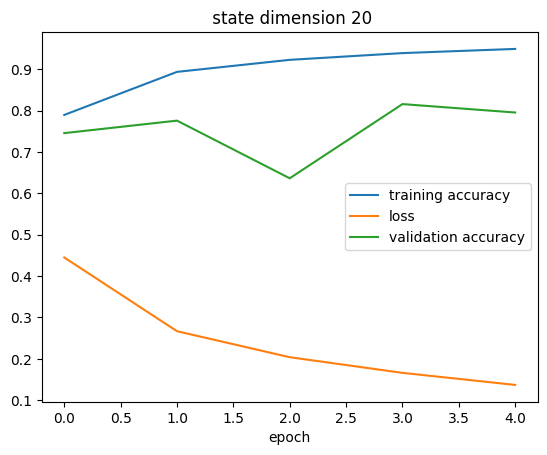

In [22]:
# Define Vanilla model with hyperparameter tuning
state_dim = 20
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[20]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning20',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.xlabel('epoch')
plt.legend()

## State dim = 50

Trial 6 Complete [00h 01m 37s]
val_accuracy: 0.8126000165939331

Best val_accuracy So Far: 0.8885999917984009
Total elapsed time: 00h 10m 23s
Results summary
Results in Vanilla_tuning50\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.001
Score: 0.8885999917984009

Trial 3 summary
Hyperparameters:
state_dim: 50
dropout: 0.4
learning_rate: 0.01
Score: 0.843999981880188

Trial 0 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.001
Score: 0.8381999731063843

Trial 1 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.0001
Score: 0.8230000138282776

Trial 2 summary
Hyperparameters:
state_dim: 50
dropout: 0.4
learning_rate: 0.0001
Score: 0.8198000192642212

Trial 5 summary
Hyperparameters:
state_dim: 50
dropout: 0.4
learning_rate: 0.001
Score: 0.8126000165939331

****************************************************************

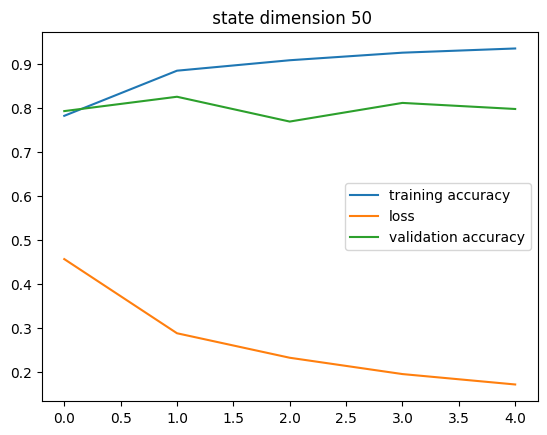

In [9]:
# Define Vanilla model with hyperparameter tuning
state_dim = 50
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[50]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning50',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 100

Trial 6 Complete [00h 02m 56s]
val_accuracy: 0.8303999900817871

Best val_accuracy So Far: 0.8641999959945679
Total elapsed time: 00h 19m 19s
Results summary
Results in Vanilla_tuning100\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.01
Score: 0.8641999959945679

Trial 5 summary
Hyperparameters:
state_dim: 100
dropout: 0.5
learning_rate: 0.01
Score: 0.8303999900817871

Trial 1 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.0001
Score: 0.8285999894142151

Trial 0 summary
Hyperparameters:
state_dim: 100
dropout: 0.0
learning_rate: 0.001
Score: 0.8144000172615051

Trial 3 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.001
Score: 0.8087999820709229

Trial 2 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.01
Score: 0.7626000046730042

***********************************************************

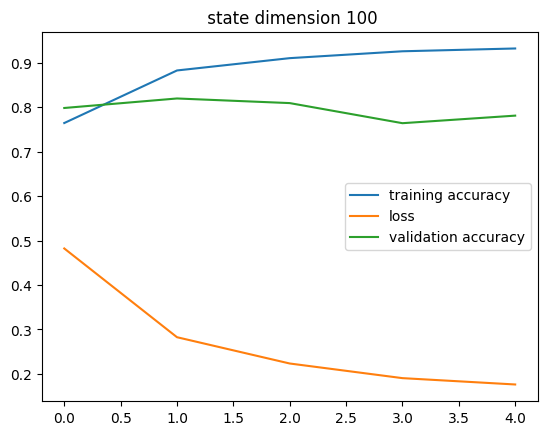

In [10]:
# Define Vanilla model with hyperparameter tuning
state_dim = 100
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[100]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning100',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 200

Trial 6 Complete [00h 11m 28s]
val_accuracy: 0.8187999725341797

Best val_accuracy So Far: 0.850600004196167
Total elapsed time: 00h 52m 19s
Results summary
Results in Vanilla_tuning200\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
state_dim: 200
dropout: 0.6
learning_rate: 0.001
Score: 0.850600004196167

Trial 4 summary
Hyperparameters:
state_dim: 200
dropout: 0.6
learning_rate: 0.01
Score: 0.842199981212616

Trial 1 summary
Hyperparameters:
state_dim: 200
dropout: 0.0
learning_rate: 0.001
Score: 0.8407999873161316

Trial 3 summary
Hyperparameters:
state_dim: 200
dropout: 0.4
learning_rate: 0.01
Score: 0.8187999725341797

Trial 5 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.0001
Score: 0.8187999725341797

Trial 0 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.01
Score: 0.8130000233650208

**************************************************************

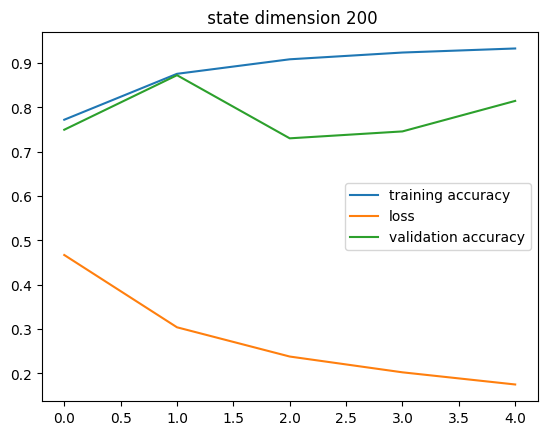

In [11]:
# Define Vanilla model with hyperparameter tuning
state_dim = 200
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[200]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning200',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 500

Trial 6 Complete [00h 28m 41s]
val_accuracy: 0.8082000017166138

Best val_accuracy So Far: 0.8335999846458435
Total elapsed time: 02h 57m 00s
Results summary
Results in Vanilla_tuning500\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.001
Score: 0.8335999846458435

Trial 1 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.0001
Score: 0.8241999745368958

Trial 5 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.0001
Score: 0.8082000017166138

Trial 3 summary
Hyperparameters:
state_dim: 500
dropout: 0.6
learning_rate: 0.01
Score: 0.8064000010490417

Trial 0 summary
Hyperparameters:
state_dim: 500
dropout: 0.5
learning_rate: 0.001
Score: 0.7886000275611877

Trial 4 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.01
Score: 0.7870000004768372

*********************************************************

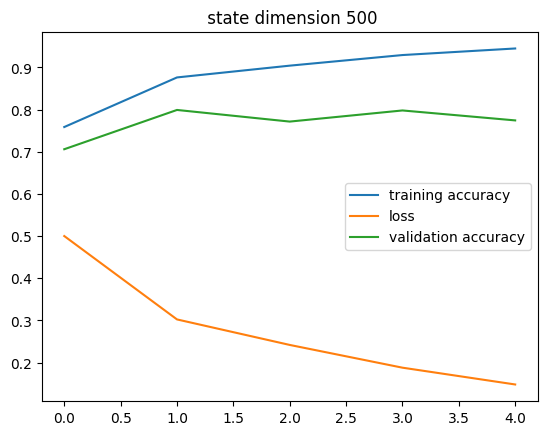

In [12]:
# Define Vanilla model with hyperparameter tuning
state_dim = 500
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[500]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning500',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

# LSTM

In [13]:
LSTM_accuracy = []
LSTM_loss = []

## State dim = 20

Trial 6 Complete [00h 01m 18s]
val_accuracy: 0.8321999907493591

Best val_accuracy So Far: 0.8410000205039978
Total elapsed time: 00h 07m 53s
Results summary
Results in lstm_tuning20\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.0001
Score: 0.8410000205039978

Trial 5 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.001
Score: 0.8321999907493591

Trial 2 summary
Hyperparameters:
state_dim: 20
dropout: 0.0
learning_rate: 0.0001
Score: 0.8285999894142151

Trial 0 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.01
Score: 0.8144000172615051

Trial 4 summary
Hyperparameters:
state_dim: 20
dropout: 0.6
learning_rate: 0.0001
Score: 0.8098000288009644

Trial 1 summary
Hyperparameters:
state_dim: 20
dropout: 0.4
learning_rate: 0.001
Score: 0.7886000275611877

********************************************************************

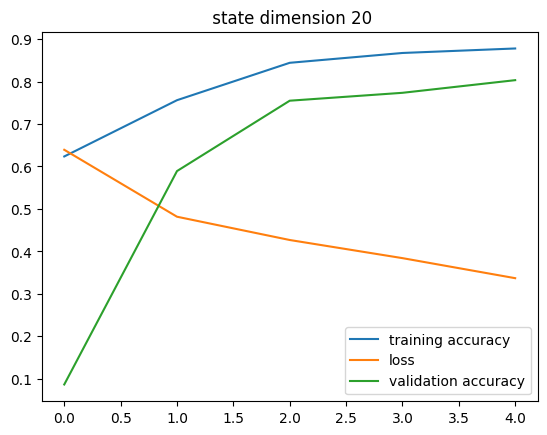

In [14]:
# Define LSTM model with hyperparameter tuning
state_dim = 20
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[20]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning20',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 50

Trial 6 Complete [00h 01m 37s]
val_accuracy: 0.8769999742507935

Best val_accuracy So Far: 0.8769999742507935
Total elapsed time: 00h 10m 08s
Results summary
Results in lstm_tuning50\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 5 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.001
Score: 0.8769999742507935

Trial 2 summary
Hyperparameters:
state_dim: 50
dropout: 0.4
learning_rate: 0.01
Score: 0.8766000270843506

Trial 0 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.001
Score: 0.8632000088691711

Trial 4 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.01
Score: 0.8453999757766724

Trial 1 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.0001
Score: 0.8077999949455261

Trial 3 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.01
Score: 0.8062000274658203

************************************************************************

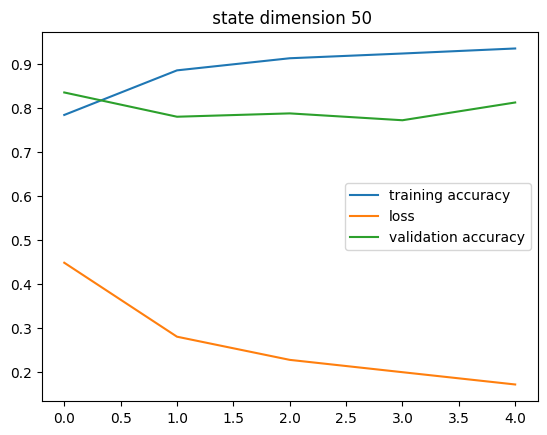

In [15]:
# Define LSTM model with hyperparameter tuning
state_dim = 50
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[50]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning50',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 100

Trial 6 Complete [00h 02m 57s]
val_accuracy: 0.8281999826431274

Best val_accuracy So Far: 0.842199981212616
Total elapsed time: 00h 18m 07s
Results summary
Results in lstm_tuning100\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 100
dropout: 0.5
learning_rate: 0.0001
Score: 0.842199981212616

Trial 1 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.0001
Score: 0.8352000117301941

Trial 5 summary
Hyperparameters:
state_dim: 100
dropout: 0.0
learning_rate: 0.001
Score: 0.8281999826431274

Trial 3 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.01
Score: 0.8198000192642212

Trial 2 summary
Hyperparameters:
state_dim: 100
dropout: 0.0
learning_rate: 0.0001
Score: 0.8154000043869019

Trial 0 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.001
Score: 0.800599992275238

****************************************************************

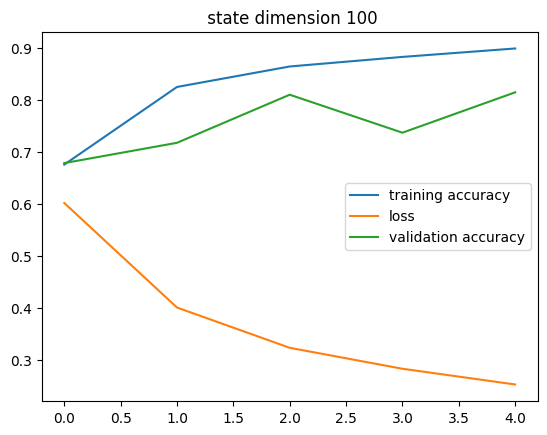

In [16]:
# Define LSTM model with hyperparameter tuning
state_dim = 100
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[100]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning100',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 200

Trial 6 Complete [00h 05m 47s]
val_accuracy: 0.8203999996185303

Best val_accuracy So Far: 0.8450000286102295
Total elapsed time: 00h 34m 59s
Results summary
Results in lstm_tuning200\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
state_dim: 200
dropout: 0.0
learning_rate: 0.001
Score: 0.8450000286102295

Trial 5 summary
Hyperparameters:
state_dim: 200
dropout: 0.4
learning_rate: 0.0001
Score: 0.8203999996185303

Trial 1 summary
Hyperparameters:
state_dim: 200
dropout: 0.6
learning_rate: 0.001
Score: 0.8105999827384949

Trial 4 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.01
Score: 0.8091999888420105

Trial 3 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.0001
Score: 0.7871999740600586

Trial 2 summary
Hyperparameters:
state_dim: 200
dropout: 0.4
learning_rate: 0.001
Score: 0.781000018119812

***************************************************************

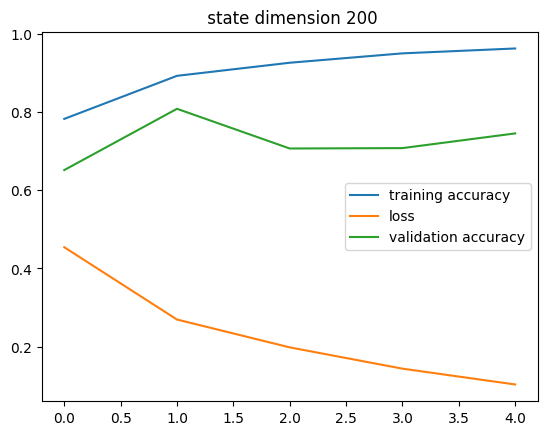

In [17]:
# Define LSTM model with hyperparameter tuning
state_dim = 200
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[200]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning200',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 500

Trial 6 Complete [00h 28m 06s]
val_accuracy: 0.7174000144004822

Best val_accuracy So Far: 0.8528000116348267
Total elapsed time: 02h 46m 20s
Results summary
Results in lstm_tuning500\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.0001
Score: 0.8528000116348267

Trial 2 summary
Hyperparameters:
state_dim: 500
dropout: 0.5
learning_rate: 0.0001
Score: 0.8446000218391418

Trial 1 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.001
Score: 0.8108000159263611

Trial 0 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.001
Score: 0.8058000206947327

Trial 4 summary
Hyperparameters:
state_dim: 500
dropout: 0.5
learning_rate: 0.01
Score: 0.7838000059127808

Trial 5 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.01
Score: 0.7174000144004822

***************************************************************

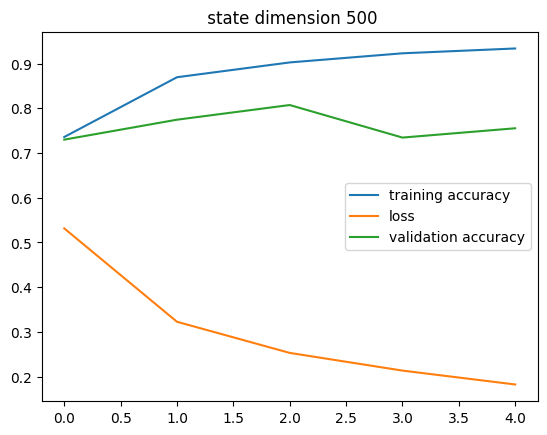

In [18]:
# Define LSTM model with hyperparameter tuning
state_dim = 500
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[500]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning500',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

# Vanilla vs LSTM


In [19]:
dimensions = [20,50,100,200,500]

Text(0.5, 1.0, 'LSTM vs Vanilla accuracy')

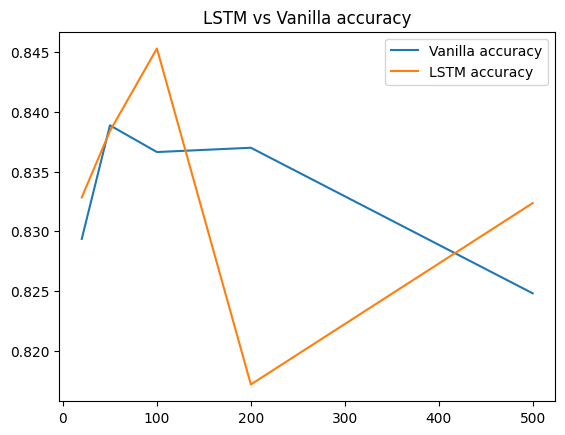

In [20]:
plt.plot(dimensions,Vanilla_accuracy,label='Vanilla accuracy')
plt.plot(dimensions,LSTM_accuracy,label = 'LSTM accuracy')
plt.legend()
plt.title('LSTM vs Vanilla accuracy')

Text(0.5, 1.0, 'LSTM vs Vanilla loss')

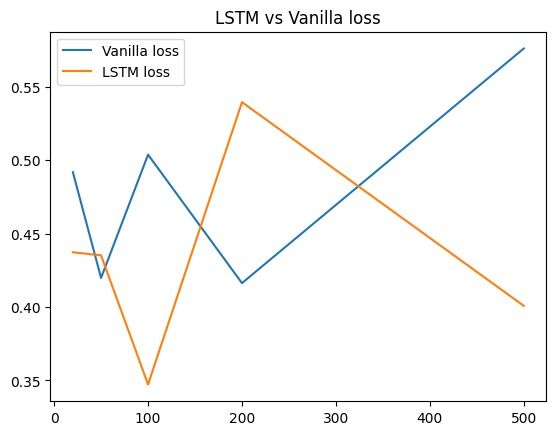

In [21]:
plt.plot(dimensions,Vanilla_loss,label='Vanilla loss')
plt.plot(dimensions,LSTM_loss,label = 'LSTM loss')
plt.legend()
plt.title('LSTM vs Vanilla loss')

Text(0, 0.5, 'Accuracy')

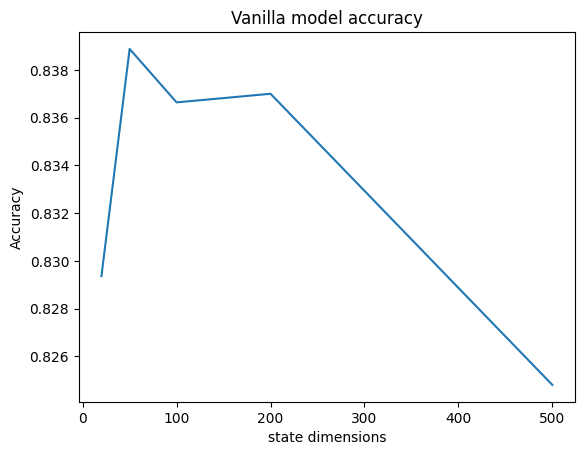

In [30]:
plt.plot(dimensions,Vanilla_accuracy)
plt.title("Vanilla model accuracy")
plt.xlabel('state dimensions')
plt.ylabel('Accuracy')